In [1]:
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = np.load('eNodeB_a.npy')

In [3]:
minimum = 200
data = np.array([user for user in data if user.shape[0] > minimum])

In [4]:
def compute_features(data):
    
    feat = np.zeros((9,))
    
    time = data[-1,-1]-data[-1,0]
    
    feat[0] = data[:,4].mean()
    feat[1] = data[:,4].std()
    feat[2] = st.iqr(data[:,4])
    feat[3] = data[:,3].mean()
    feat[4] = data[:,3].std()
    feat[5] = st.entropy(data[:,4])
    feat[6] = st.entropy(data[:,3])
    feat[7] = time.mean()
    feat[8] = time.std()
    
    return feat

In [5]:
feat = np.zeros((len(data),9))
perm = np.random.permutation(len(data))
data = data[perm]

for i in range(len(data)):
    feat[i,:] = compute_features(data[i])
        
scaler = StandardScaler()
m = int(0.6*len(data))
feat[np.isnan(feat)] = 0
X_train = feat[:m]
X_test = feat[m:]
X_train_S = scaler.fit_transform(X_train)
X_test_S = scaler.transform(X_test)

C:\Users\Giova\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2544: RuntimeWarning: invalid value encountered in true_divide
  pk = 1.0*pk / np.sum(pk, axis=0)


In [6]:
pca = PCA()
X_train_S_D = pca.fit_transform(X_train_S)
X_test_S_D = pca.transform(X_test_S)
print('Explained variance:', pca.explained_variance_ratio_)
n_components = 5
X_tr = X_train_S_D[:,:n_components]
X_ts = X_test_S_D[:,:n_components]

Explained variance: [0.37311237 0.22331786 0.14083105 0.12281525 0.06292664 0.03624185
 0.03314659 0.00760838 0.        ]


In [7]:
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_ts = scaler.transform(X_ts)

In [8]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(4)
lab_tr = gmm.fit_predict(X_tr)
lab_ts = gmm.predict(X_ts)

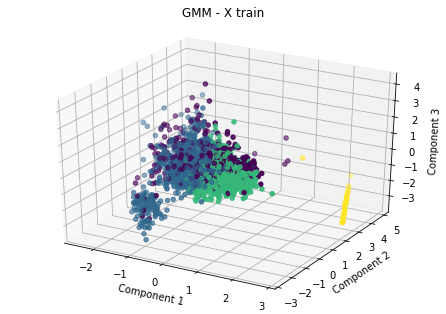

In [9]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams

rcParams['axes.titlepad'] = 25

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_tr[:,0], X_tr[:,1], X_tr[:,2], c=lab_tr)
plt.title('GMM - X train')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()

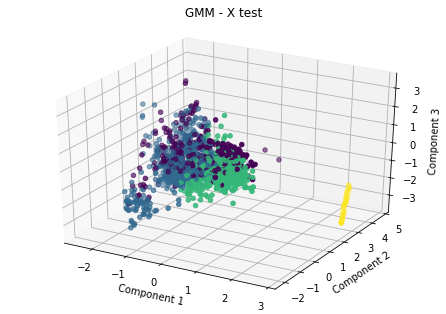

In [10]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(X_ts[:,0], X_ts[:,1], X_ts[:,2], c=lab_ts)
plt.title('GMM - X test')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
plt.show()